# Course 6 Automatidata

***

## Project Description

You are the newest member of Automatidata’s data analytics team. Your team is more than halfway through their project for the New York City Taxi & Limousine Commission (TLC). Earlier, you completed a project proposal, used Python to explore and analyze the TLC dataset, created data visualizations, and conducted an A/B test. Now, the New York City TLC wants your team to build a multiple linear regression (MLR) model for ride durations based on a variety of variables.

The New York City TLC is impressed with your work so far. Now, they want your team to identify which variables or factors influence the amount of gratuity a rider gives a driver. Your work will help TLC stakeholders make informed business decisions that will increase gratuities and improve driver satisfaction. 

At a meeting with New York City TLC stakeholders, your team suggests building a random forest model to predict whether or not a rider will be a generous tipper (>= 20%). At the end of the meeting, Titus Nelson, the Operations Manager at the New York City TLC, says that he will share the suggestion with his organization's leadership team. 

## Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| ID |	Trip identification number |
| VendorID |	A code indicating the TPEP provider that provided the record.  |
| tpep_pickup_datetime |	The date and time when the meter was engaged. |
| tpep_dropoff_datetime |	The date and time when the meter was disengaged. |
| Passenger_count |The number of passengers in the vehicle	|
| Trip_distance | The elapsed trip distance in miles reported by the taximeter.	|
| PULocationID | TLC Taxi Zone in which the taximeter was engaged.	|
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged.	|
| RateCodeID | The final rate code in effect at the end of the trip	|
| Store_and_fwd_flag | This flag indicates whether the trip record was held in vehicle memory before being sent to the vendor	|
| Payment_type  | A numeric code signifying how the passenger paid for the trip	|
| Fare_amount | The time-and-distance fare calculated by the meter.	|
| Extra  | Miscellaneous extras and surcharges	|
| MTA_tax |	0.50 MTA tax that is automatically triggered based on the metered  rate in use |
| Improvement_surcharge |	0.30 improvement surcharge assessed trips at the flag drop |
| Tip_amount |	Tip amount – This field is automatically populated for credit card  tips. Cash tips are not included. |
| Tolls_amount |	Total amount of all tolls paid in trip. |
| Total_amount |	The total amount charged to passengers. Does not include cash tips. |

## Data sources used

This project uses a dataset called Automatidata_data.csv. It contains data gathered by the New York City Taxi & Limousine Commission. For each trip, there are many different data variables gathered. 

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random


import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols


import datetime
from datetime import datetime, timedelta


import sklearn
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_validate, KFold, RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
#from sklearn.pipeline import Pipeline
#from sklearn.feature_selection import RFE, RFECV, SelectKBest, f_classif, f_regression, chi2
#from sklearn.inspection import permutation_importance

from sklearn.tree import export_graphviz, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

#from sklearn.experimental import enable_hist_gradient_boosting
##from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor, plot_tree
#from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR
#from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, ExtraTreesRegressor
#from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, HistGradientBoostingClassifier, HistGradientBoostingRegressor



%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# import pickle
# from pickle import dump, load

# Use Feature-Engine library

import feature_engine
from feature_engine import imputation as mdi
from feature_engine.outliers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser
#from feature_engine.discretisation import ArbitraryDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder


pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)


random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("Yellow_Taxi_Trip_Data.csv", parse_dates=['tpep_pickup_datetime','tpep_dropoff_datetime'])

In [3]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.00,0.00,0.50,2.76,0.00,0.30,16.56
1,1,2017-04-11 14:53:00,2017-04-11 15:19:00,1,1.80,1,N,186,43,1,16.00,0.00,0.50,4.00,0.00,0.30,20.80
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.50,0.00,0.50,1.45,0.00,0.30,8.75
3,2,2017-05-07 13:17:00,2017-05-07 13:48:00,1,3.70,1,N,188,97,1,20.50,0.00,0.50,6.39,0.00,0.30,27.69
4,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.50,0.50,0.50,0.00,0.00,0.30,17.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,2,4.00,1.00,0.50,0.00,0.00,0.30,5.80
22695,2,2017-08-06 16:43:00,2017-08-06 17:24:00,1,16.71,2,N,132,164,1,52.00,0.00,0.50,14.64,5.76,0.30,73.20
22696,2,2017-09-04 14:54:00,2017-09-04 14:58:00,1,0.42,1,N,107,234,2,4.50,0.00,0.50,0.00,0.00,0.30,5.30
22697,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,10.50,0.00,0.50,1.70,0.00,0.30,13.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               22699 non-null  int64         
 1   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 3   passenger_count        22699 non-null  int64         
 4   trip_distance          22699 non-null  float64       
 5   RatecodeID             22699 non-null  int64         
 6   store_and_fwd_flag     22699 non-null  object        
 7   PULocationID           22699 non-null  int64         
 8   DOLocationID           22699 non-null  int64         
 9   payment_type           22699 non-null  int64         
 10  fare_amount            22699 non-null  float64       
 11  extra                  22699 non-null  float64       
 12  mta_tax                22699 non-null  float64       
 13  t

In [5]:
df.describe(include='all')

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,22699.00,22699,22699,22699.00,22699.00,22699.00,22699,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00
unique,NaN,22435,22451,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2017-02-01 21:08:00,2017-11-08 22:34:00,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3,3,NaN,NaN,NaN,22600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2017-01-01 00:08:00,2017-01-01 00:17:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2017-12-31 23:45:30,2017-12-31 23:49:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.56,NaN,NaN,1.64,2.91,1.04,NaN,162.41,161.53,1.34,13.03,0.33,0.50,1.84,0.31,0.30,16.31
std,0.50,NaN,NaN,1.29,3.65,0.71,NaN,66.63,70.14,0.50,13.24,0.46,0.04,2.80,1.40,0.02,16.10
min,1.00,NaN,NaN,0.00,0.00,1.00,NaN,1.00,1.00,1.00,-120.00,-1.00,-0.50,0.00,0.00,-0.30,-120.30
25%,1.00,NaN,NaN,1.00,0.99,1.00,NaN,114.00,112.00,1.00,6.50,0.00,0.50,0.00,0.00,0.30,8.75


In [6]:
df.shape

(22699, 17)

In [7]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount'], dtype='object')

## Data Visualization

### Univariate Data Exploration

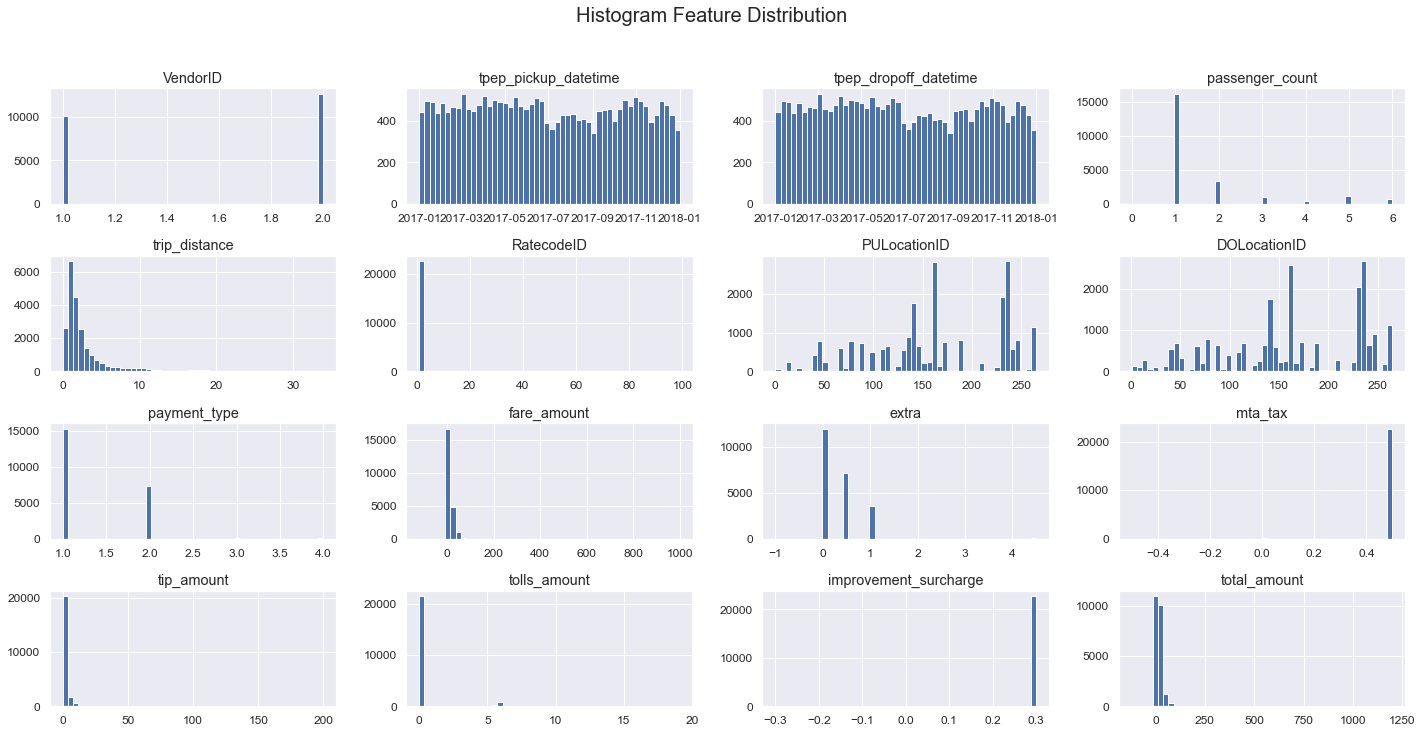

In [8]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

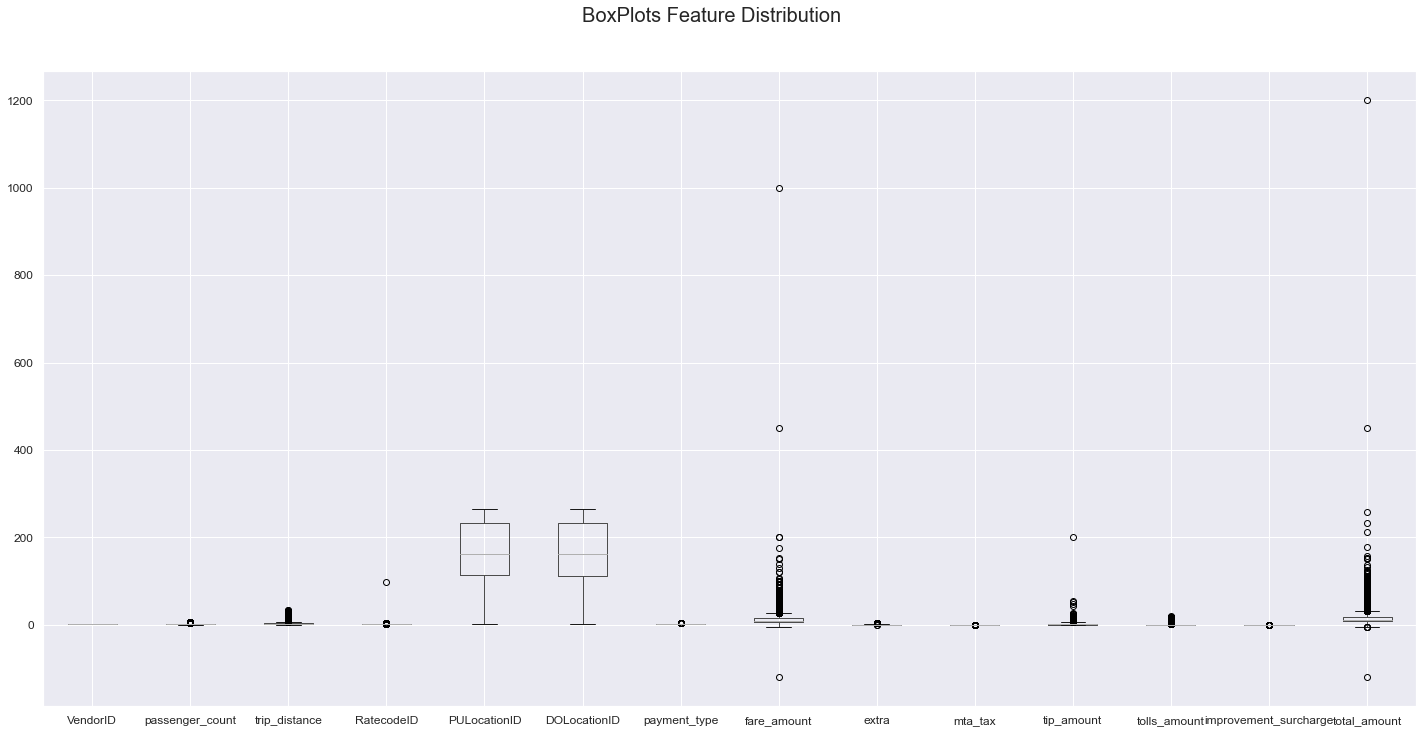

In [9]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

## Data Preprocessing

### Data Engineering

In [10]:
df["percentage"] = df["tip_amount"] / df["fare_amount"]

In [11]:
df["percentage"]

0       0.21
1       0.25
2       0.22
3       0.31
4       0.00
        ... 
22694   0.00
22695   0.28
22696   0.00
22697   0.16
22698   0.21
Name: percentage, Length: 22699, dtype: float64

In [12]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,percentage
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.00,0.00,0.50,2.76,0.00,0.30,16.56,0.21
1,1,2017-04-11 14:53:00,2017-04-11 15:19:00,1,1.80,1,N,186,43,1,16.00,0.00,0.50,4.00,0.00,0.30,20.80,0.25
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.50,0.00,0.50,1.45,0.00,0.30,8.75,0.22
3,2,2017-05-07 13:17:00,2017-05-07 13:48:00,1,3.70,1,N,188,97,1,20.50,0.00,0.50,6.39,0.00,0.30,27.69,0.31
4,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.50,0.50,0.50,0.00,0.00,0.30,17.80,0.00


In [13]:
# create a list of our conditions
conditions = [
    (df['percentage'] >= 0.2),
    (df['percentage'] < 0.2)
    ]

# create a list of the values we want to assign for each condition
values = [1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['tipper'] = np.select(conditions, values)

In [14]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,percentage,tipper
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.00,0.00,0.50,2.76,0.00,0.30,16.56,0.21,1
1,1,2017-04-11 14:53:00,2017-04-11 15:19:00,1,1.80,1,N,186,43,1,16.00,0.00,0.50,4.00,0.00,0.30,20.80,0.25,1
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.50,0.00,0.50,1.45,0.00,0.30,8.75,0.22,1
3,2,2017-05-07 13:17:00,2017-05-07 13:48:00,1,3.70,1,N,188,97,1,20.50,0.00,0.50,6.39,0.00,0.30,27.69,0.31,1
4,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.50,0.50,0.50,0.00,0.00,0.30,17.80,0.00,0


In [15]:
df["tipper"].value_counts()

0    11603
1    11096
Name: tipper, dtype: int64

### Drop unwanted features

In [16]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'percentage', 'tipper'], dtype='object')

In [17]:
df.drop(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'RatecodeID', 'store_and_fwd_flag', 
         'PULocationID', 'DOLocationID', 'payment_type', 'extra', 'mta_tax', 
         'tolls_amount', 'improvement_surcharge', 'total_amount', 'percentage'], axis=1, inplace=True)

In [18]:
df

,passenger_count,trip_distance,fare_amount,tip_amount,tipper
0,6,3.34,13.00,2.76,1
1,1,1.80,16.00,4.00,1
2,1,1.00,6.50,1.45,1
3,1,3.70,20.50,6.39,1
4,1,4.37,16.50,0.00,0
...,...,...,...,...,...
22694,3,0.61,4.00,0.00,0
22695,1,16.71,52.00,14.64,1
22696,1,0.42,4.50,0.00,0
22697,1,2.36,10.50,1.70,0


### Treat Missing Values

In [19]:
df.isnull().sum()

passenger_count    0
trip_distance      0
fare_amount        0
tip_amount         0
tipper             0
dtype: int64

### Treat Outliers

In [20]:
df.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tipper
count,22699.00,22699.00,22699.00,22699.00,22699.00
mean,1.64,2.91,13.03,1.84,0.49
std,1.29,3.65,13.24,2.80,0.50
min,0.00,0.00,-120.00,0.00,0.00
25%,1.00,0.99,6.50,0.00,0.00
50%,1.00,1.61,9.50,1.35,0.00
75%,2.00,3.06,14.50,2.45,1.00
max,6.00,33.96,999.99,200.00,1.00


In [21]:
windsorizer = Winsorizer(capping_method='gaussian', tail='left', fold= 0.01 , variables=['fare_amount'])

In [22]:
windsorizer.fit(df)

Winsorizer(fold=0.01, tail='left', variables=['fare_amount'])

In [23]:
df2 = windsorizer.transform(df)

In [24]:
df2

,passenger_count,trip_distance,fare_amount,tip_amount,tipper
0,6,3.34,13.00,2.76,1
1,1,1.80,16.00,4.00,1
2,1,1.00,12.89,1.45,1
3,1,3.70,20.50,6.39,1
4,1,4.37,16.50,0.00,0
...,...,...,...,...,...
22694,3,0.61,12.89,0.00,0
22695,1,16.71,52.00,14.64,1
22696,1,0.42,12.89,0.00,0
22697,1,2.36,12.89,1.70,0


In [25]:
df2.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tipper
count,22699.00,22699.00,22699.00,22699.00,22699.00
mean,1.64,2.91,16.60,1.84,0.49
std,1.29,3.65,11.75,2.80,0.50
min,0.00,0.00,12.89,0.00,0.00
25%,1.00,0.99,12.89,0.00,0.00
50%,1.00,1.61,12.89,1.35,0.00
75%,2.00,3.06,14.50,2.45,1.00
max,6.00,33.96,999.99,200.00,1.00


In [26]:
windsorizer.left_tail_caps_

{'fare_amount': 12.894194379060464}

In [27]:
windsorizer.right_tail_caps_

{}

In [28]:
df2.head()

,passenger_count,trip_distance,fare_amount,tip_amount,tipper
0,6,3.34,13.00,2.76,1
1,1,1.80,16.00,4.00,1
2,1,1.00,12.89,1.45,1
3,1,3.70,20.50,6.39,1
4,1,4.37,16.50,0.00,0


In [29]:
df2.groupby("tipper").mean()

,passenger_count,trip_distance,fare_amount,tip_amount
tipper,,,,
0,1.65,2.92,16.67,0.57
1,1.63,2.91,16.52,3.16


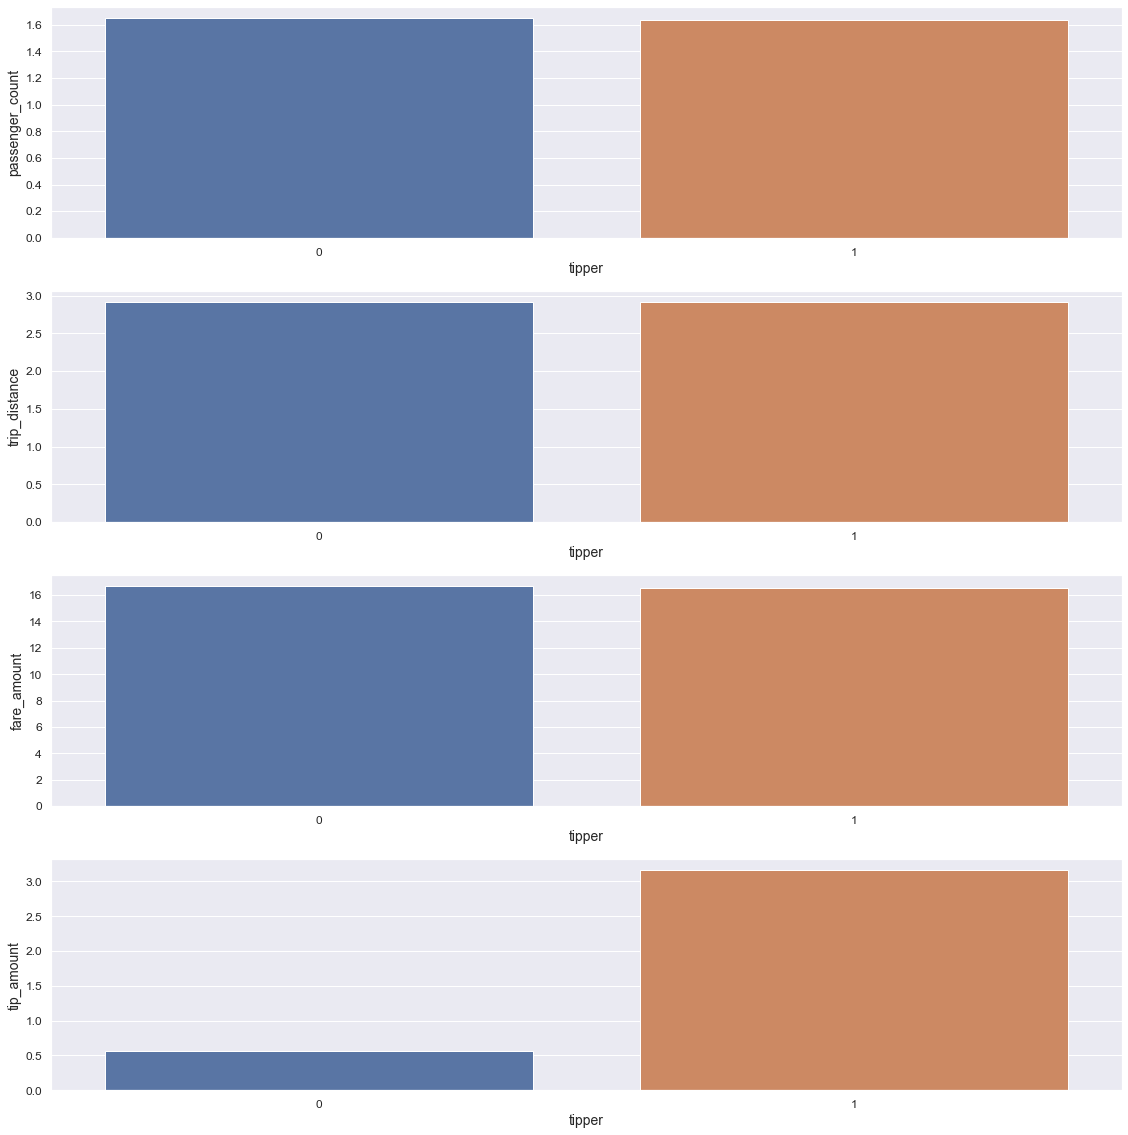

In [30]:
# Plot 4 rows and 1 column (can be expanded)

fig, ax = plt.subplots(4,1, sharex=False, figsize=(16,16))
#fig.suptitle('Main Title')


sns.barplot(x="tipper", y="passenger_count", data=df2, ci=None, ax=ax[0])
#ax[0].set_title('passenger_count')
#ax[0].tick_params('x', labelrotation=45)
ax[0].set_xlabel("tipper")
ax[0].set_ylabel("passenger_count")

sns.barplot(x="tipper", y="trip_distance", data=df2, ci=None, ax=ax[1])
#ax[1].set_title('Title of the second chart')
#ax[1].tick_params('x', labelrotation=45)
ax[1].set_xlabel("tipper")
ax[1].set_ylabel("trip_distance")

sns.barplot(x="tipper", y="fare_amount", data=df2, ci=None, ax=ax[2])
#ax[2].set_title('Title of the third chart')
#ax[2].tick_params('x', labelrotation=45)
ax[2].set_xlabel("tipper")
ax[2].set_ylabel("fare_amount")

sns.barplot(x="tipper", y="tip_amount", data=df2, ci=None, ax=ax[3])
#ax[3].set_title('Title of the fourth chart')
#ax[3].tick_params('x', labelrotation=45)
ax[3].set_xlabel("tipper")
ax[3].set_ylabel("tip_amount")

plt.tight_layout()
plt.show()


### Correlation

In [31]:
df2.corr()

,passenger_count,trip_distance,fare_amount,tip_amount,tipper
passenger_count,1.00,0.02,0.01,-0.01,-0.01
trip_distance,0.02,1.00,0.70,0.50,-0.00
fare_amount,0.01,0.70,1.00,0.67,-0.01
tip_amount,-0.01,0.50,0.67,1.00,0.46
tipper,-0.01,-0.00,-0.01,0.46,1.00


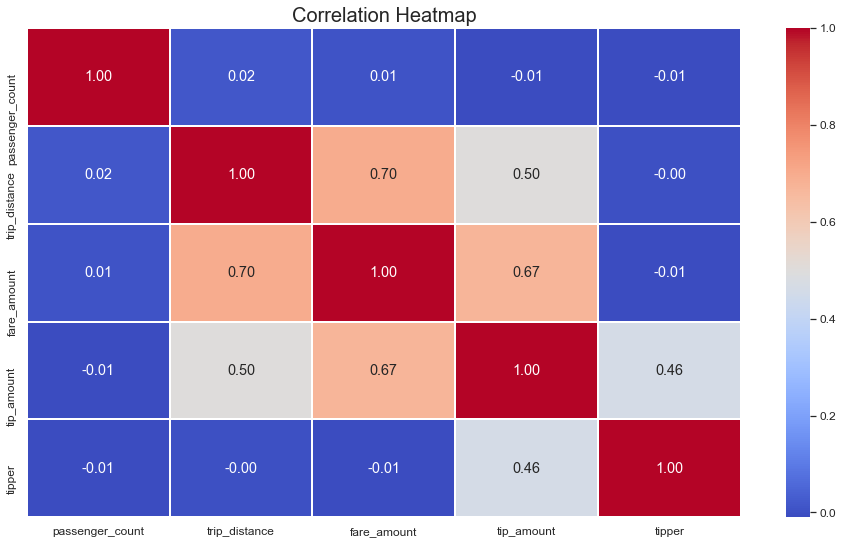

In [32]:
plt.figure(figsize=(16,9))
sns.heatmap(df2.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

### Create and save processed dataset

In [33]:
#df2.to_csv("taxi2.csv",index=False)

In [34]:
df2 = pd.read_csv("taxi2.csv")

In [35]:
df2.shape

(22699, 5)

In [36]:
df2 = df2.sample(n=5000, random_state=0)

In [37]:
df2.shape

(5000, 5)

In [38]:
df2.tipper.value_counts()

0    2614
1    2386
Name: tipper, dtype: int64

In [39]:
df2.head()

,passenger_count,trip_distance,fare_amount,tip_amount,tipper
5818,1,3.09,14.00,2.50,0
18134,1,4.10,28.00,0.00,0
4655,2,0.72,12.89,1.26,1
7378,1,4.49,15.50,0.00,0
13914,2,2.00,12.89,0.00,0


### Train Test Split

In [40]:
X = df2.iloc[:,:4]
y = df2.iloc[:,4]

In [41]:
df2.shape

(5000, 5)

In [42]:
X.values, y.values

(array([[ 1.        ,  3.09      , 14.        ,  2.5       ],
        [ 1.        ,  4.1       , 28.        ,  0.        ],
        [ 2.        ,  0.72      , 12.89419438,  1.26      ],
        ...,
        [ 1.        ,  1.6       , 12.89419438,  2.15      ],
        [ 1.        ,  4.03      , 14.5       ,  0.        ],
        [ 3.        ,  4.18      , 18.5       ,  4.06      ]]),
 array([0, 0, 1, ..., 1, 0, 1], dtype=int64))

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [44]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 4), (1000, 4), (4000,), (1000,))

## Feature Scaling

In [ ]:
X_train

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

In [ ]:
X_test_scaled

## Model Training

### Decision Tree

In [45]:
# Instantiate the model
decision_tree = DecisionTreeClassifier(random_state=0)

# Fit the model to training data
decision_tree.fit(X_train, y_train)

# Make predictions on test data
dt_pred = decision_tree.predict(X_test)

In [46]:
dt_pred

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,

In [47]:
# Generate performance metrics
print("Accuracy:", "%.3f" % accuracy_score(y_test, dt_pred))
print("Precision:", "%.3f" % precision_score(y_test, dt_pred))
print("Recall:", "%.3f" % recall_score(y_test, dt_pred))
print("F1 Score:", "%.3f" % f1_score(y_test, dt_pred))

Accuracy: 0.966
Precision: 0.957
Recall: 0.973
F1 Score: 0.965


In [48]:
dtcm = confusion_matrix(y_test,dt_pred)
dtcm

array([[502,  21],
       [ 13, 464]], dtype=int64)

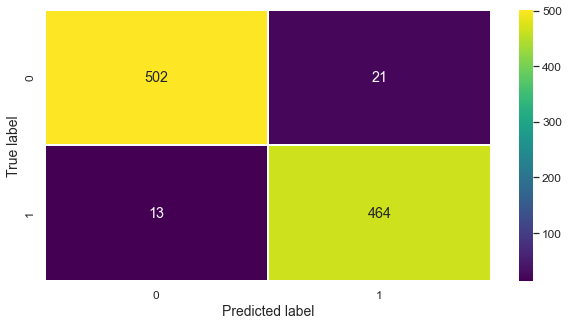

In [49]:
fig , ax = plt.subplots(figsize=(10,5))
sns.heatmap(dtcm, annot=True,fmt='.4g',linewidths=2, cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

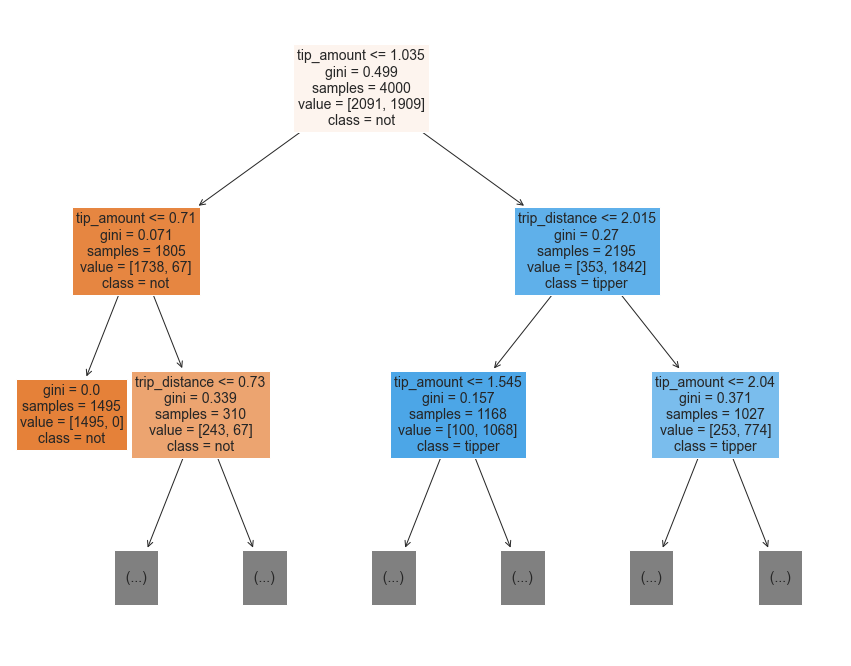

In [50]:
# Plot the tree
plt.figure(figsize=(15,12))
plot_tree(decision_tree, max_depth=2, fontsize=14, feature_names=X.columns, 
          class_names={0:'not', 1:'tipper'}, filled=True);
plt.show()

### Random Forest Model

In [51]:
rf = RandomForestClassifier(random_state=0)

In [52]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [53]:
rf_pred = rf.predict(X_test)

In [54]:
rf_pred

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,

## Cross-validated hyperparameter tuning

Cross-validating a model using GridSearchCV can be done in a number of different ways. If you find notebooks online that other people have written, you'll likely soon discover this for yourself. But all variations must fulfill the same general requirements. (Refer to the [GridSearchCV documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) for further reading.)

The format presented below is step-wise, making it easier to follow.

* Create a dictionary of hyperparameters to search over:

  - key = name of hyperparameter (string)
  - value = values to search over (list)

In [55]:
parameters = {'n_estimators':np.arange(100,300,100),
              'criterion': ('gini','entropy'),
              'max_depth': np.arange(2,10,2),
              'min_samples_leaf': np.arange(5,20,5)
             }

* Create a dictionary of scoring metrics to capture. These metrics can be selected from scikit-learn's [built-in options](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) or custom-defined. For this exercise, we'll capture accuracy, precision, recall, and F1 score so we can examine all of them. The metrics are entered as strings.

In [56]:
# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

* Instantiate the classifier (and set the `random_state`)

In [57]:
# Instantiate the classifier
tuned_rf_tree = RandomForestClassifier(random_state=0)

* Instantiate the `GridSearchCV` object. Pass as arguments:
  - The classifier (`tuned_decision_tree`)
  - The dictionary of hyperparameters to search over (`tree_para`)
  - The dictionary of scoring metrics (`scoring`)
  - The number of cross-validation folds you want (`cv=5`)
  - The scoring metric that you want GridSearch to use when it selects the "best" model (i.e., the model that performs best on average over all validation folds) (`refit='f1'`*)

    \* The reason it's called `refit` is because once the algorithm finds the combination of hyperparameters that results in the best average score across all validation folds, it will then refit this model to _all_ of the training data. Remember, up until now, with a 5-fold cross-validation, the model has only ever been fit on 80% (4/5) of the training data, because the remaining 20% was held out as a validation fold.

* Fit the data (`X_train`, `y_train`) to the `GridSearchCV` object (`clf`)

Depending on the number of different hyperparameters you choose, the number of combinations you search over, the size of your data, and your available computing resources, this could take a long time. 

In [58]:
%%time

# Instantiate the GridSearch
clf = GridSearchCV(tuned_rf_tree, 
                   parameters, 
                   scoring = scoring, 
                   cv=5, 
                   refit="f1")

# Fit the model
clf.fit(X_train, y_train)

CPU times: total: 1min 28s
Wall time: 1min 30s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': array([2, 4, 6, 8]),
                         'min_samples_leaf': array([ 5, 10, 15]),
                         'n_estimators': array([100, 200])},
             refit='f1', scoring={'f1', 'precision', 'recall', 'accuracy'})

In [59]:
# Examine the best model from GridSearch
clf.best_estimator_

RandomForestClassifier(max_depth=8, min_samples_leaf=5, random_state=0)

The `best_score_` attribute returns the best average F1 score across the different folds among all the combinations of hyperparameters. Note that if we had set `refit='recall'` when we instantiated our `GridSearchCV` object earlier, then calling `best_score_` would return the best recall score, and the best parameters might not be the same as what they are in the above cell, because the model would be selected based on a different metric.

In [60]:
print("Best Avg. Validation Score: ", "%.4f" % clf.best_score_)

Best Avg. Validation Score:  0.9655


In [61]:
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.
  
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                        'F1': f1,
                        'Recall': recall,
                        'Precision': precision,
                        'Accuracy': accuracy
                        },
                        ignore_index=True
                       )
  
    return table

In [62]:
# Call the function on our model
result_table = make_results("Tuned Random Forest Tree", clf)

In [63]:
result_table

,Model,F1,Recall,Precision,Accuracy
0,Tuned Random Forest Tree,0.97,0.98,0.95,0.97


### Using RandomSearchCV

In [64]:
parameters = {'n_estimators':np.arange(100,300,100),
              'criterion': ('gini','entropy'),
              'max_depth': np.arange(2,10,2),
              'min_samples_leaf': np.arange(5,20,5)
             }

In [65]:
randm = RandomizedSearchCV(estimator=tuned_rf_tree, param_distributions = parameters, cv = 5, n_iter = 10, 
                           n_jobs=-1, scoring='f1', verbose=1, refit=True)

In [66]:
%%time

randm.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
CPU times: total: 734 ms
Wall time: 10.9 s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': array([2, 4, 6, 8]),
                                        'min_samples_leaf': array([ 5, 10, 15]),
                                        'n_estimators': array([100, 200])},
                   scoring='f1', verbose=1)

In [67]:
randm.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=5,
                       n_estimators=200, random_state=0)

In [68]:
randm.best_score_

0.9482098691477049

In [69]:
randm.best_params_

{'n_estimators': 200,
 'min_samples_leaf': 5,
 'max_depth': 6,
 'criterion': 'entropy'}

In [70]:
model2 = RandomForestClassifier(n_estimators=200, min_samples_leaf=5, max_depth=6, criterion="entropy", random_state=0)

In [72]:
model2.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=5,
                       n_estimators=200, random_state=0)

In [74]:
y_pred2 = model2.predict(X_test)

In [75]:
y_pred2

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,

### Model Evaluation

In [76]:
cm = confusion_matrix(y_test,y_pred2)
cm

array([[462,  61],
       [  3, 474]], dtype=int64)

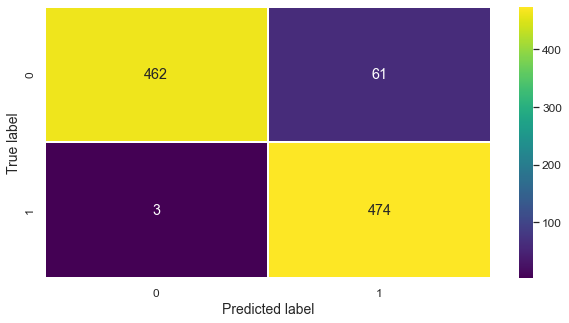

In [77]:
fig , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot=True,fmt='.4g',linewidths=2, cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [78]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.99      0.88      0.94       523
           1       0.89      0.99      0.94       477

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



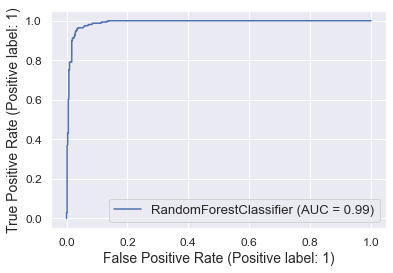

In [80]:
plot_roc_curve(model2,X_test,y_test)
plt.show()

In [81]:
model2.feature_importances_

array([0.00279544, 0.10084039, 0.03711296, 0.85925121])

In [82]:
feat_importances = pd.Series(model2.feature_importances_, index=X.columns)

In [83]:
feat_importances

passenger_count   0.00
trip_distance     0.10
fare_amount       0.04
tip_amount        0.86
dtype: float64

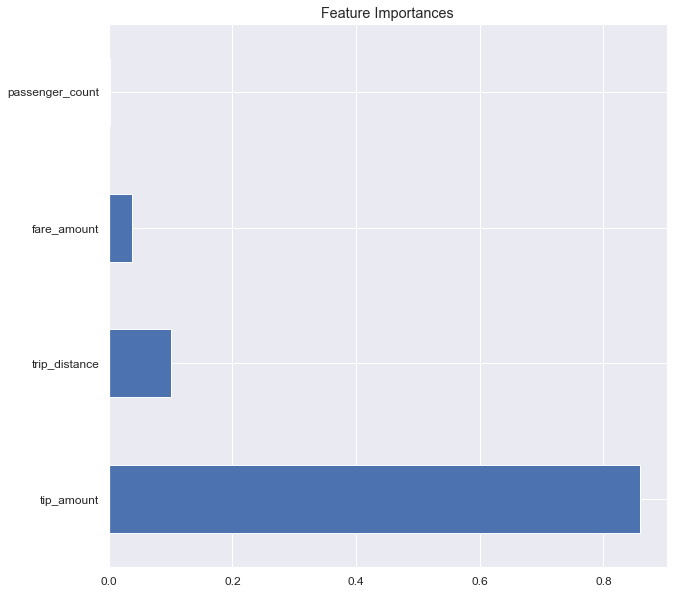

In [84]:
feat_importances.nlargest(10).plot(kind='barh', figsize=(10,10))
plt.title('Feature Importances')
plt.show()

### Table Formatted View

In [85]:
table = X_test.copy()

In [86]:
table["True Value"] = y_test.copy()

In [87]:
table["Predicted"] = np.round(y_pred2,2)

In [88]:
table

,passenger_count,trip_distance,fare_amount,tip_amount,True Value,Predicted
8905,1,0.36,12.89,1.06,1,1
12664,3,1.24,12.89,2.16,1,1
10720,1,1.50,12.89,0.00,0,0
1091,1,0.88,12.89,0.00,0,0
3601,1,4.40,16.50,3.00,0,1
...,...,...,...,...,...,...
12107,1,9.46,29.00,10.67,1,1
2481,2,0.90,12.89,2.35,1,1
15487,1,1.29,12.89,0.00,0,0
4501,1,2.27,12.89,0.00,0,0


### Cross-Validation

In [89]:
cv = cross_val_score(model2,X,y,cv=5,verbose=1,scoring='accuracy')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.8s finished


In [90]:
cv.mean()

0.9469999999999998

#### Python code done by Dennis Lam